# Importing libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.sparse import csr_matrix
import pickle
from shapely.geometry import Point
from shapely.geometry import LineString
import seaborn as sns

# Defining paths

In [2]:
# cur_dir = 'C:/Users/cortiz/Projects/inscopix_project_cajal/data/20211204/mouse_02_IL'
cur_dir = 'C:/Users/cortiz/Projects/inscopix_project_cajal/data/20211204/mouse_01_CA1'
# cur_dir = 'C:/Users/cortiz/Projects/inscopix_project_cajal/data/20211206/mouse_02_IL'
path_table = os.path.join(cur_dir, 'behavior', 'table_cut.csv')
path_mat_spikes = os.path.join(cur_dir, 'spikes', 'finalSpikesMat.mat')

# Parameters

In [3]:
n_bins = 20
color_palette = np.array(sns.color_palette('Spectral_r', n_bins))

# Functions

In [4]:
def loadAll(cur_dir):
    
    path_pickle = os.path.join(cur_dir, 'pickle')
    global meta_spikes, df_dlc, mat_spikes, df_frames, dict_meta, reference_points
    with open(os.path.join(path_pickle, 'meta_spikes.pck'), 'rb') as f:
        meta_spikes = pickle.load(f)
    with open(os.path.join(path_pickle, 'df_dlc_projections.pck'), 'rb') as f:
        df_dlc = pickle.load(f)
    with open(os.path.join(path_pickle, 'mat_spikes.pck'), 'rb') as f:
        mat_spikes = pickle.load(f)
    with open(os.path.join(path_pickle, 'df_frames.pck'), 'rb') as f:
        df_frames = pickle.load(f)
    with open(os.path.join(path_pickle, 'dict_meta.pck'), 'rb') as f:
        dict_meta = pickle.load(f)
    with open(os.path.join(path_pickle, 'reference_points.pck'), 'rb') as f:
        reference_points = pickle.load(f)
        
    df_dlc_axis = df_dlc[['closest_arm', 'projection', 'environment']]
    meta_spikes = meta_spikes.join(df_dlc_axis, on = 'behavioral_frame')
    
    
def plotArm(dict_arm):    

    c = reference_points[dict_arm['mode']]
    max_val = np.max([np.max(d) if k != 'mode' else 0 for (k,d) in dict_arm.items()])
    bins_colorpalette = np.linspace(0, max_val+0.00000001, num = n_bins + 1)

    for arm in ['middle', 'left', 'right']:

        if arm == 'middle':
            xe = c['x_m']
            ye = c['y_m']
        elif arm == 'left':
            xe = c['x_l']
            ye = c['y_l']
        elif arm == 'right':
            xe = c['x_r']
            ye = c['y_r']

        x_vect = np.linspace(c['x_c'], xe, num=n_bins)
        y_vect = np.linspace(c['y_c'], ye, num=n_bins)

        color_code = np.digitize(dict_arm[arm], bins_colorpalette)

        plt.scatter(x_vect, y_vect, c = color_palette[color_code-1], s = 50)
        plt.gca().set_aspect('equal')

    plt.axis('off')

# Loading data

In [5]:
loadAll(path_pickle)

# Heatmaps analysis

In [6]:
hist_edges = np.linspace(0, 1.0001, num = n_bins + 1)

### t_maze

In [7]:
list_dict_arms = list()

for env in ['t_maze', 'y_maze']:

    sub_spikes = meta_spikes.query('environment == @env')
    dict_arm = {'mode': env}
    for arm in ['middle', 'left', 'right']:
        sub_arm = sub_spikes.query('closest_arm == @arm')
        sample_counts, _ = np.histogram(sub_arm['projection'], hist_edges)
        dict_arm[arm] = sample_counts
    list_dict_arms.append(dict_arm)

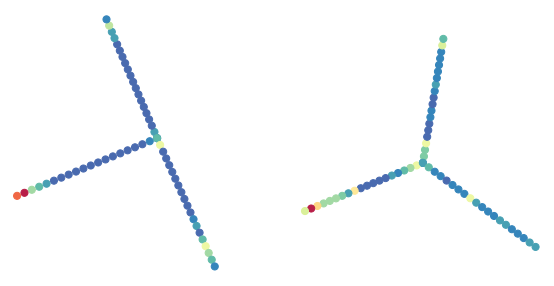

In [8]:
plt.figure(figsize = (10,5))

for i,dict_arm in enumerate(list_dict_arms):
    cur_ax = plt.subplot(1, len(list_dict_arms), i+1)
    plotArm(dict_arm)